In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [2]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
city_ride_df = pd.merge(city_df, ride_df)

# Display the data table for preview
city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
city_ride_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
urban_only = city_ride_df.loc[city_ride_df['type'] == 'Urban']
suburban_only = city_ride_df.loc[city_ride_df['type'] == 'Suburban']
rural_only = city_ride_df.loc[city_ride_df['type'] == 'Rural']


## Bubble Plot of Ride Sharing Data

In [7]:
urban_x = urban_only.groupby('city')['ride_id'].count()
urban_y = urban_only.groupby('city')['fare'].mean()
urban_drivers = urban_only.groupby('city')['driver_count'].mean()


In [8]:
suburban_x = suburban_only.groupby('city')['ride_id'].count()
suburban_y = suburban_only.groupby('city')['fare'].mean()
suburban_drivers = suburban_only.groupby('city')['driver_count'].mean()

rural_x = rural_only.groupby('city')['ride_id'].count()
rural_y = rural_only.groupby('city')['fare'].mean()
rural_drivers = rural_only.groupby('city')['driver_count'].mean()

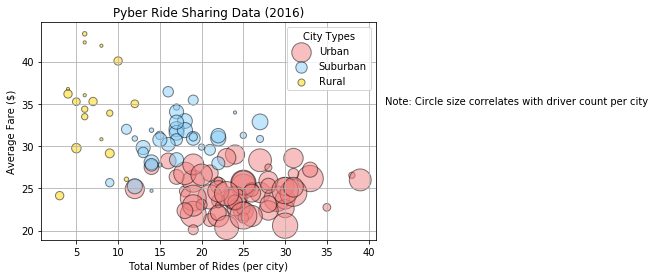

In [9]:
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=urban_drivers*10, color='lightcoral', alpha=0.5, label='Urban',edgecolors='black')
plt.scatter(suburban_x, suburban_y, s=suburban_drivers*10, color='lightskyblue', alpha=0.5, label='Suburban', edgecolors='black')
plt.scatter(rural_x, rural_y, s=rural_drivers*10, color='gold', alpha=0.5, label='Rural', edgecolors='black')
plt.legend(title='City Types')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Incorporate a text label regarding circle size
plt.annotate("Note: Circle size correlates with driver count per city", xy=(42,35),annotation_clip=False)

# Save Figure
plt.savefig('pyber_ride_share_fig.png',bbox_inches="tight")

# Show Figure
plt.show()


## Total Fares by City Type

In [10]:
# Calculate Type Percents
total_fares = city_ride_df['fare'].sum()
urban_fares = urban_only['fare'].sum()
suburban_fares = suburban_only['fare'].sum()
rural_fares = rural_only['fare'].sum()
fares = [urban_fares / total_fares * 100, suburban_fares / total_fares * 100, rural_fares / total_fares *100]
fares

[62.72463496228438, 30.46387206273222, 6.81149297498341]

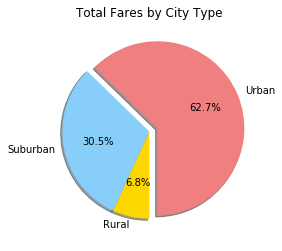

In [11]:
# Build Pie Chart
plt.pie(fares, explode=(0.1, 0, 0), labels=['Urban', 'Suburban', 'Rural'], \
        colors=('lightcoral', 'lightskyblue', 'gold'), autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Total Fares by City Type")
# Save Figure
plt.savefig('ride_share_fares_pie.png')

# Show Figure
plt.show()

## Total Rides by City Type

In [12]:
# Calculate Ride Percents
total_rides = city_ride_df['ride_id'].count()
urban_count = city_ride_df['type'].value_counts()['Urban']
suburban_count = city_ride_df['type'].value_counts()['Suburban']
rural_count = city_ride_df['type'].value_counts()['Rural']
type_pct = [urban_count / total_rides * 100, suburban_count / total_rides * 100, rural_count / total_rides * 100]
type_pct

[68.42105263157895, 26.31578947368421, 5.263157894736842]

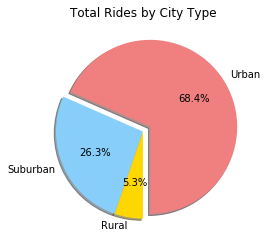

In [13]:
# Build Pie Chart
plt.pie(type_pct, explode=(0.1, 0, 0), labels=['Urban', 'Suburban', 'Rural'], \
        colors=('lightcoral', 'lightskyblue', 'gold'), autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Total Rides by City Type")
# Save Figure
plt.savefig('ride_share_types_pie.png')

# Show Figure
plt.show()


## Total Drivers by City Type

In [14]:
# Calculate Driver Percents
urban_drv_count = urban_drivers.sum() 
suburban_drv_count = suburban_drivers.sum()
rural_drv_count = rural_drivers.sum()
total_drv = urban_drv_count + suburban_drv_count + rural_drv_count
driver_pct = [urban_drv_count / total_drv * 100, suburban_drv_count / total_drv * 100, rural_drv_count / total_drv *100]
driver_pct

[80.89471913891691, 16.481668348469558, 2.6236125126135215]

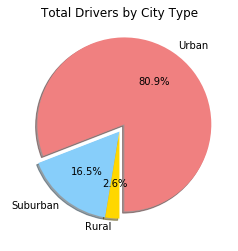

In [15]:
# Build Pie Charts
plt.pie(driver_pct, explode=(0.1, 0, 0), labels=['Urban', 'Suburban', 'Rural'], \
        colors=('lightcoral', 'lightskyblue', 'gold'), autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig('ride_share_drivers_pie.png')

# Show Figure
plt.show()


# Pyber Ride Share Data Summary
* The number of rides is most abundant in urban cities followed by suburban and rural cities, while the fares for each ride are generally lower in urban cities and increasingly higher as they go from suburban to rural cities
* While the individual fares are generally lower in urban cities, due to the greater number of total rides (68.4% of all rides), the overall fares collected is greatest in urban cities (62.7% of all fares collected)
* The percentage of drivers in urban cities (80.9%) greatly outnumbers drivers in suburban and rural cities 